<a href="https://colab.research.google.com/github/Gabriel22Pantoja/Car_Price_Market/blob/master/Car_Price_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import os

In [2]:
used_cars = pd.read_csv("/content/used_car_prices.csv")

In [3]:
used_cars.head(5)

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,1680204632-1,Skoda Octavia A8 2022,2023-03,"967,000 EGP","926,000 EGP","1,017,000 EGP"
1,1680204632-2,Skoda Octavia A8 2022,2023-02,"979,000 EGP","931,000 EGP","1,045,000 EGP"
2,1680204632-3,Skoda Octavia A8 2022,2023-01,"917,000 EGP","893,000 EGP","950,000 EGP"
3,1680204632-4,Skoda Octavia A8 2022,2022-12,"881,000 EGP","793,000 EGP","950,000 EGP"
4,1680204632-5,Skoda Octavia A8 2022,2022-11,"868,000 EGP","789,000 EGP","950,000 EGP"


In [4]:
#descrições
used_cars.describe()

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
count,79090,79090,78612,78612,78612,78612
unique,79090,1908,128,1397,893,916
top,1680204632-1,Hyundai Excel 1996,2022-11,"76,000 EGP","71,000 EGP","81,000 EGP"
freq,1,128,1480,593,1345,1260


In [5]:
#informações
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79090 entries, 0 to 79089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  79090 non-null  object
 1   Car Model          79090 non-null  object
 2   Month/Year         78612 non-null  object
 3   Average price      78612 non-null  object
 4   Minimum price      78612 non-null  object
 5   Maximum price      78612 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


### Tratamento de valores nulos e duplicados

In [6]:
#verificando quantidade de valores nulos
used_cars.isnull().sum()

web-scraper-order      0
Car Model              0
Month/Year           478
Average price        478
Minimum price        478
Maximum price        478
dtype: int64

In [7]:
#apagando valores nulos
used_cars = used_cars.dropna()

In [8]:
#verificando quantidade de valores nulos
used_cars.isnull().sum()

web-scraper-order    0
Car Model            0
Month/Year           0
Average price        0
Minimum price        0
Maximum price        0
dtype: int64

In [9]:
#verificando quantidade de valores duplicados
used_cars.duplicated().sum()

0

In [10]:
#selecionando a primeira string da frase
def marca(texto):
  return texto.split()[0]

In [11]:
#selecionando todas as strings depois da primeira
def modelo(texto):
  texto = texto.split()[1::-1]
  return " ".join(texto)

In [12]:
#Selecionar o ano do modelo
def ano_modelo(texto):
  return texto.split()[-1]

In [13]:
#criando uma coluna da marca, modelo e ano do modelo
used_cars['Brand'] = used_cars['Car Model'].apply(marca)
used_cars['Model'] = used_cars['Car Model'].apply(modelo)
used_cars['Year-Model'] = used_cars['Car Model'].apply(ano_modelo)

In [14]:
#converte uma string, lista, array ou série de datas em um objeto do tipo datetime64[ns] do pandas.
used_cars['Month/Year'] = pd.to_datetime(used_cars['Month/Year'])

In [15]:
#criando uma coluna mês e ano
used_cars['Month'] = used_cars['Month/Year'].dt.month
used_cars['Year'] = used_cars['Month/Year'].dt.year

In [16]:
#apagando colunas
used_cars = used_cars.drop(['web-scraper-order','Month/Year','Car Model'],axis=1)

In [17]:
used_cars.head()

,Average price,Minimum price,Maximum price,Brand,Model,Year-Model,Month,Year
0,"967,000 EGP","926,000 EGP","1,017,000 EGP",Skoda,Octavia Skoda,2022,3,2023
1,"979,000 EGP","931,000 EGP","1,045,000 EGP",Skoda,Octavia Skoda,2022,2,2023
2,"917,000 EGP","893,000 EGP","950,000 EGP",Skoda,Octavia Skoda,2022,1,2023
3,"881,000 EGP","793,000 EGP","950,000 EGP",Skoda,Octavia Skoda,2022,12,2022
4,"868,000 EGP","789,000 EGP","950,000 EGP",Skoda,Octavia Skoda,2022,11,2022


In [18]:
#função para remover caracteres dos valores númericos
def remover_string(texto):
  texto = texto.replace(',','')
  return texto[:-4]

In [19]:
#inserindo as colunas que devem ter os caracteres removidos
columns = ['Average price','Minimum price','Maximum price']
for column in columns:
  used_cars[column] = used_cars[column].apply(remover_string)

In [20]:
def converter_float(texto):
  return float(texto)

In [21]:
def converter_int(texto):
  return int(texto)

In [22]:
#inserindo as colunas que devem ter os valores convertidos
columns = ['Average price','Minimum price','Maximum price']
for column in columns:
  used_cars[column] = used_cars[column].apply(converter_float)

In [23]:
#inserindo coluna do modelo no ano para converter para inteiro
used_cars['Year-Model'] = used_cars['Year-Model'].apply(converter_int)

In [24]:
used_cars.head(5)

,Average price,Minimum price,Maximum price,Brand,Model,Year-Model,Month,Year
0,967000.0,926000.0,1017000.0,Skoda,Octavia Skoda,2022,3,2023
1,979000.0,931000.0,1045000.0,Skoda,Octavia Skoda,2022,2,2023
2,917000.0,893000.0,950000.0,Skoda,Octavia Skoda,2022,1,2023
3,881000.0,793000.0,950000.0,Skoda,Octavia Skoda,2022,12,2022
4,868000.0,789000.0,950000.0,Skoda,Octavia Skoda,2022,11,2022


In [25]:
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78612 entries, 0 to 79089
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average price  78612 non-null  float64
 1   Minimum price  78612 non-null  float64
 2   Maximum price  78612 non-null  float64
 3   Brand          78612 non-null  object 
 4   Model          78612 non-null  object 
 5   Year-Model     78612 non-null  int64  
 6   Month          78612 non-null  int64  
 7   Year           78612 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 5.4+ MB


In [26]:
np.unique(used_cars['Brand'])

array(['Audi', 'BMW', 'Baic', 'Brilliance', 'Byd', 'Canghe', 'Chana',
       'Changan', 'Chery', 'Chevrolet', 'Citroën', 'DFSK', 'Daewoo',
       'Daihatsu', 'Dodge', 'Dongfeng', 'Ds', 'Emgrand', 'Faw', 'Fiat',
       'Ford', 'Geely', 'Great', 'Haima', 'Haval', 'Honda', 'Hyundai',
       'Isuzu', 'Jac', 'Jeep', 'Jetour', 'Karry', 'Kenbo', 'Kia', 'Lada',
       'Land', 'Lifan', 'MG', 'Mahindra', 'Mazda', 'Mercedes', 'Mini',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Proton', 'Renault',
       'Saipa', 'Seat', 'Senova', 'Skoda', 'Speranza', 'Ssang', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo', 'Zotye'], dtype=object)

In [27]:
len(np.unique(used_cars['Brand']))

60

In [28]:
len(np.unique(used_cars['Model']))

338

In [29]:
#marca de carro com o maior preço médio
used_cars.loc[used_cars['Average price'] == used_cars['Average price'].max(), 'Brand']

43084    Land
Name: Brand, dtype: object

In [30]:
vendas_modelo = used_cars['Model'].value_counts().head(10)

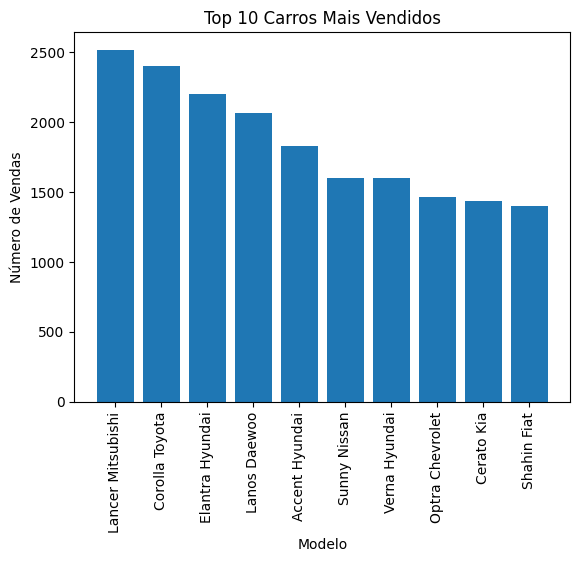

In [31]:
plt.bar(vendas_modelo.index, vendas_modelo.values)
plt.xlabel('Modelo')
plt.ylabel('Número de Vendas')
plt.title('Top 10 Carros Mais Vendidos')
plt.xticks(rotation=90)  # Rotação dos rótulos do eixo x para melhor visualização
plt.show()